Dataset Overview:
Shape: (2191, 5)

Data Types:
 Subject      object
body         object
date         object
from         object
sentiment    object
dtype: object

Missing Values:
 Subject      0
body         0
date         0
from         0
sentiment    0
dtype: int64


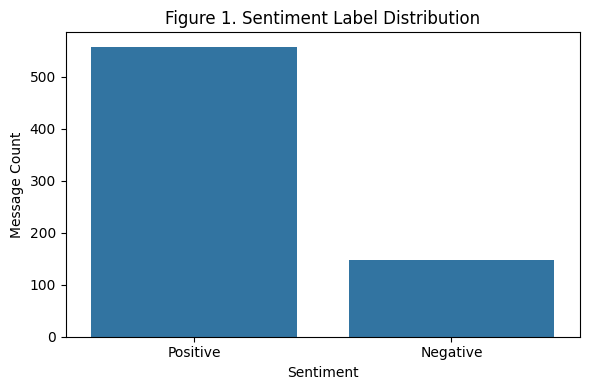

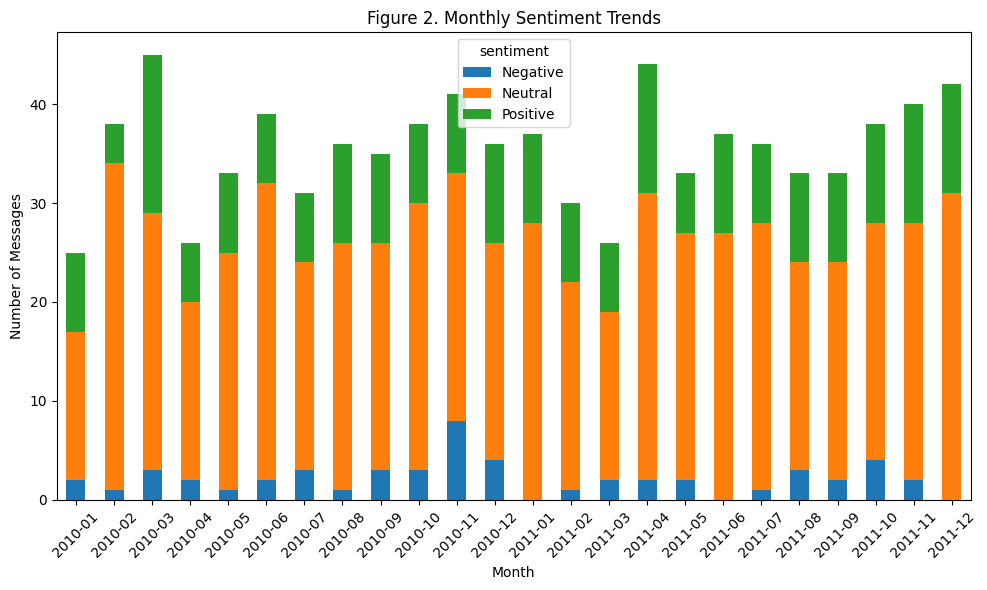

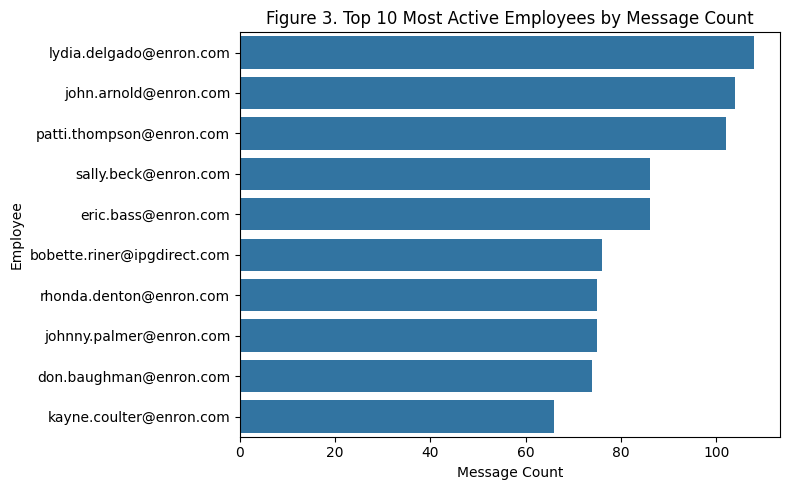

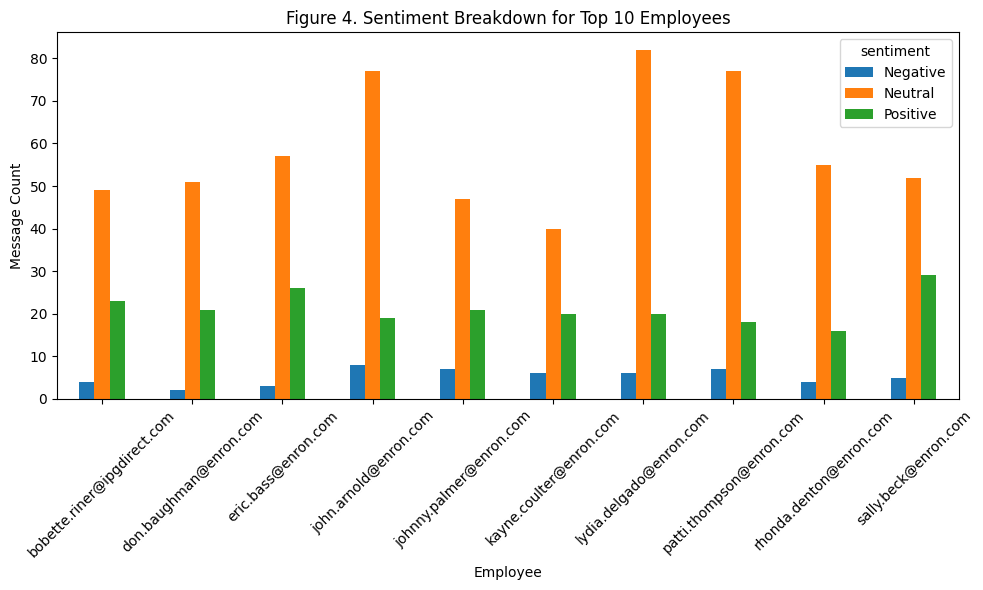

EDA complete.


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

output_dir = os.path.join(os.getcwd(), "output")
os.makedirs(output_dir, exist_ok=True)
df = pd.read_csv("sentiment_practice_output.csv")

print("Dataset Overview:")
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

#Sentiment Distribution (Figure 1)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="sentiment", order=["Positive", "Negative"])
plt.title("Figure 1. Sentiment Label Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Message Count")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "figure1_sentiment_distribution.png"))
plt.show()

#Monthly Sentiment Trends (Figure 2)
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["date"])
df["month"] = df["date"].dt.to_period("M").astype(str)
monthly_sentiment = df.groupby(["month", "sentiment"]).size().unstack(fill_value=0)
monthly_sentiment.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Figure 2. Monthly Sentiment Trends")
plt.xlabel("Month")
plt.ylabel("Number of Messages")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "figure2_monthly_sentiment_trends.png"))
plt.show()

#Top 10 Most Active Employees (Figure 3)
top_senders = df["from"].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(y=top_senders.index, x=top_senders.values, orient="h")
plt.title("Figure 3. Top 10 Most Active Employees by Message Count")
plt.xlabel("Message Count")
plt.ylabel("Employee")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "figure3_top_10_senders.png"))
plt.show()

#Sentiment Breakdown for Top 10 Employees (Figure 4)
top10_employees = top_senders.index
df_top = df[df["from"].isin(top10_employees)]
employee_sentiment = df_top.groupby(["from", "sentiment"]).size().unstack(fill_value=0)
employee_sentiment.plot(kind="bar", figsize=(10, 6))
plt.title("Figure 4. Sentiment Breakdown for Top 10 Employees")
plt.xlabel("Employee")
plt.ylabel("Message Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "figure4_top10_employee_sentiment.png"))
plt.show()

#Summary Statistics Table
summary_stats = {
    "Total Messages": len(df),
    "Unique Employees": df['from'].nunique(),
    "Earliest Message Date": df['date'].min(),
    "Latest Message Date": df['date'].max(),
    "Total Positive Messages": (df['sentiment'] == 'Positive').sum(),
    "Total Negative Messages": (df['sentiment'] == 'Negative').sum()
}
summary_df = pd.DataFrame.from_dict(summary_stats, orient="index", columns=["Value"])
summary_df.to_csv(os.path.join(output_dir, "summary_statistics_table.csv"), encoding="utf-8-sig")

print("EDA complete.")
